Dimensionality Reduction JUAN PABLO MONTOYA VALLEJO
EVERY POINT OF THIS PROJECT IS DONE IN THIS NOTEBOOK AS WELL AS IN THE FASTAPI API, YOU CAN USE THIS NOTEBOOK AS A SUMMARY OF THE WORK DONE
YOU CAN CONTRIBUTE THIS PROJECT BY A PULL REQUEST! FEEL FREE TO USE THIS IN YOUR CONVENIENCE

In [8]:
import warnings
warnings.filterwarnings('ignore')

1. Simulate any random rectangular matrix A.
- What is the rank and trace of A?
- What is the determinant of A?
- Can you invert A? How?
- How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences canyou notice between both?
- See [https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf]

In [32]:
from app.modules.matrix import Matrix
import numpy as np
my_matrix = Matrix(5,5)
print("Shape",'\n',my_matrix.shape)
print("Rank",'\n', my_matrix.rank())
print("Trace",'\n',my_matrix.trace())
print("Determinant",'\n', my_matrix.determinant())
print("Inverse",'\n', my_matrix.inverse())
print("eigenvalues A*A.T",'\n', my_matrix.eigenvalues_transpose()['eigenvalues A*A.T'])
print("eigenvalues A.T*A",'\n', my_matrix.eigenvalues_transpose()['eigenvalues A.T*A'])
print("Eigenvalues response",'\n','they are the same non zero values but in diferent order if the matrix is square')

Shape 
 (5, 5)
Rank 
 5.0
Trace 
 2.4651680049967766
Determinant 
 -0.06243978863166609
Inverse 
 [[ 1.79060578  2.69895799  2.32929438 -4.34214084  1.44334216]
 [ 0.15188713  0.26983552  1.27193907 -0.41745462 -0.15171212]
 [-1.77994262 -2.23530882 -1.61217531  3.32760273  0.21492332]
 [-0.32288996  3.69348941  1.30111365 -2.9741157   0.84126196]
 [-0.20819    -4.80739116 -3.52789775  6.12605481 -1.99689204]]
eigenvalues A*A.T 
 [6.36623128 0.92097214 0.58485361 0.17520155 0.00648946]
eigenvalues A.T*A 
 [6.36623128 0.92097214 0.00648946 0.17520155 0.58485361]
Eigenvalues response 
 they are the same non zero values but in diferent order if the matrix is square


2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
- Edit your picture to be 256x256 pixels, grayscale (single channel)
- Plot your edited face
- Calculate and plot the average face of the cohort.
- How distant is your face from the average? How would you measure it?

In [33]:
from app.modules.Picture import Pictures
from IPython import display

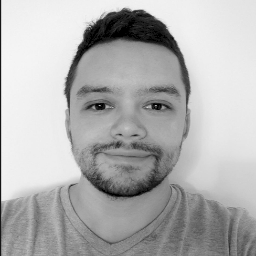

In [34]:
pictures=Pictures()
pictures.save_my_image()
display.Image("app/resources/my_image.png")

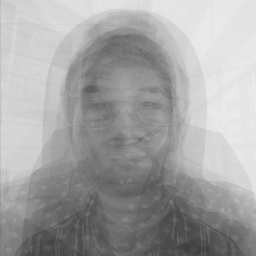

In [35]:
pictures.save_average_image()
display.Image("app/resources/average_image.png")

In [36]:
pictures.distance_average_my_image()

25790.48386517787

I used The Frobenius distance to measure the distance between matrices because it is invariant to choice of basis and it is a natural distance between matrices. the Frobenius distance is used to determine the distance between matrices because other methods like euclidian distance can't be interpreted as a natural distance in all cases.

3. Let’s create the unsupervised Python package
- Same API as scikit-learn: fit(), fit_transform(), transform(), hyperparams at init
- Manage dependencies with Pipenv or Poetry
- Implement SVD from scratch using Python and NumPy
- Implement PCA from scratch using Python and NumPy
[https://github.com/rushter/MLAlgorithms/blob/master/mla/pca.py,
https://github.com/patchy631/machine-learning/blob/main/ml_from_scratch/PCA_from_scratch.ip
ynb]
- Implement t-SNE from scratch using Python and NumPy
[https://nlml.github.io/in-raw-numpy/in-raw-numpy-t-sne/]

You can see de modules in the following route: app/modules/TSNE_unsupervised_module,PCA_unsupervised_module,SVD_unsupervised_module and we will used them in the following sections of the notebook

4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is
there any point where you can say the image is appropriately reproduced? How would you quantify how
different your photo and the approximation are?

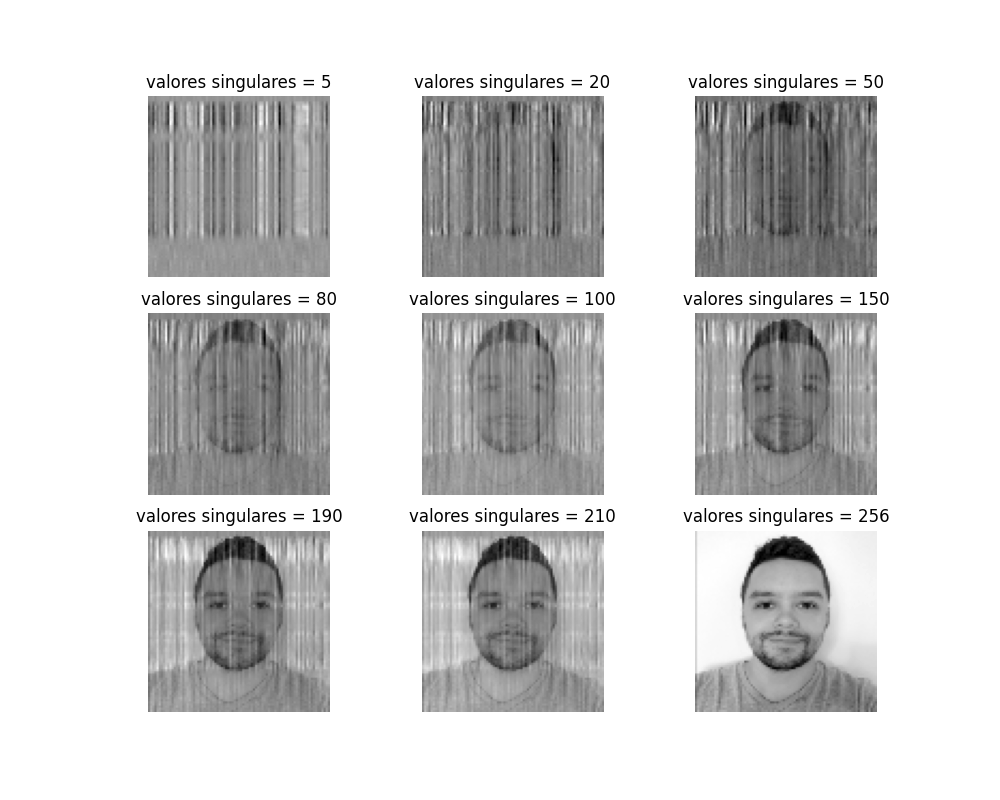

In [37]:
from app.modules.Picture import Pictures
from IPython import display
pictures=Pictures()
pictures.save_svd_image
display.Image("app/resources/SDV_image.png")

In my sdv method the image starts to be recognizable at 150 singular values, it can be used the Forebius distance to measure the distance between the aproximation and the real image as i did in the previous example.

5. Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling
this our baseline. What can you tell about the baseline performance?

In [10]:
from app.modules.scikit_learn_methods import load_mnist_dataset,Train_model_scikit_learn

x_train,y_train,x_test,y_test=load_mnist_dataset()
score=Train_model_scikit_learn(x_train,y_train,x_test,y_test)
print('Accuracy of the logistic regression model','\n',score)

Accuracy of the logistic regression model 
 0.99


An accuracy score of 0.99 indicates that the model is able to make correct predictions for 99.28% of the mnist [0,8] dataset.This is a  high accuracy score which suggests that the logistic regression model is performing well on the input data.


6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per
image.
- Plot the 2 new features generated by your algorithm
- Does this somehow impact the performance of your model?

In [11]:
from app.modules.Unsupervised import load_mnist_dataset,Train_model_scikit_learn,PCA_Training_unsupervised_module,TSNE_Training_unsupervised_module

x_train,y_train,x_test,y_test=load_mnist_dataset()
normal_score=Train_model_scikit_learn(x_train,y_train,x_test,y_test)
PCA_score=PCA_Training_unsupervised_module(x_train,y_train,x_test,y_test)
TSNE_score=TSNE_Training_unsupervised_module(x_train,y_train,x_test,y_test)
print('Normal_accuracy','\n',normal_score)
print('PCA_accuracy','\n',PCA_score)
print('TSNE_accuracy','\n',TSNE_score)

Normal_accuracy 
 0.99
PCA_accuracy 
 0.5
TSNE_accuracy 
 0.505


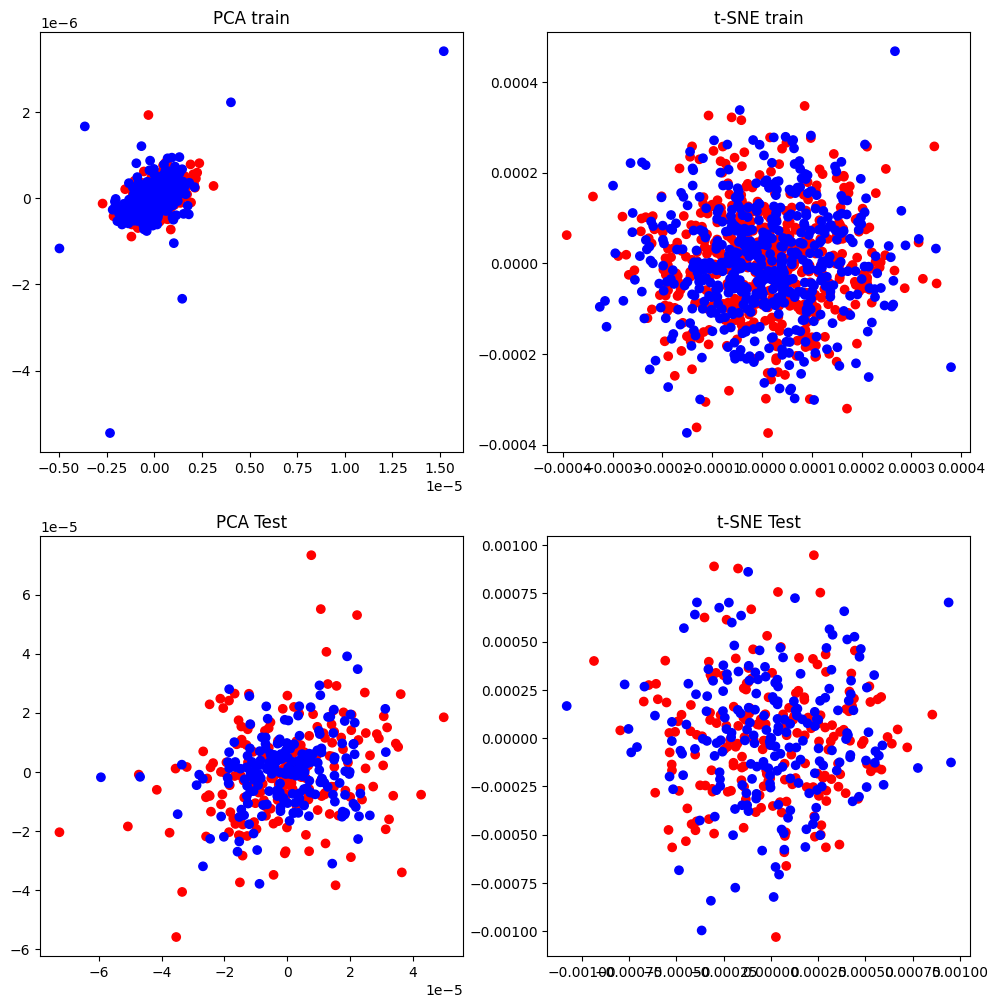

In [12]:
from app.modules.Unsupervised import plot_PCA_TSNE_unsupervised_module
plot_PCA_TSNE_unsupervised_module()

this methods are implemented only using numpy and pandas and they reduce significantly the accuracy of the model. However the dataset was reduced to 1000 images in order to process the TSNE and PCA because they take a long time to do the fit_transform function. Therefore if you want to improve the accuracy of those implementations you have to add more data and probably include other hyperparameters and functions to improve the learning curve of the Y matrix and the PCA model.

7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different
are these results from those of your implementation? Why?

In [13]:
from app.modules.scikit_learn_methods import load_mnist_dataset,Train_model_scikit_learn,PCA_Training_scikit_learn,TSNE_Training_scikit_learn,plot_PCA_TSNE_scikit

x_train,y_train,x_test,y_test=load_mnist_dataset()
normal_score=Train_model_scikit_learn(x_train,y_train,x_test,y_test)
PCA_score=PCA_Training_scikit_learn(x_train,y_train,x_test,y_test)
TSNE_score=TSNE_Training_scikit_learn(x_train,y_train,x_test,y_test)
print('Normal_accuracy','\n',normal_score)
print('PCA_accuracy','\n',PCA_score)
print('TSNE_accuracy','\n',TSNE_score)

Normal_accuracy 
 0.99
PCA_accuracy 
 0.95
TSNE_accuracy 
 0.9425


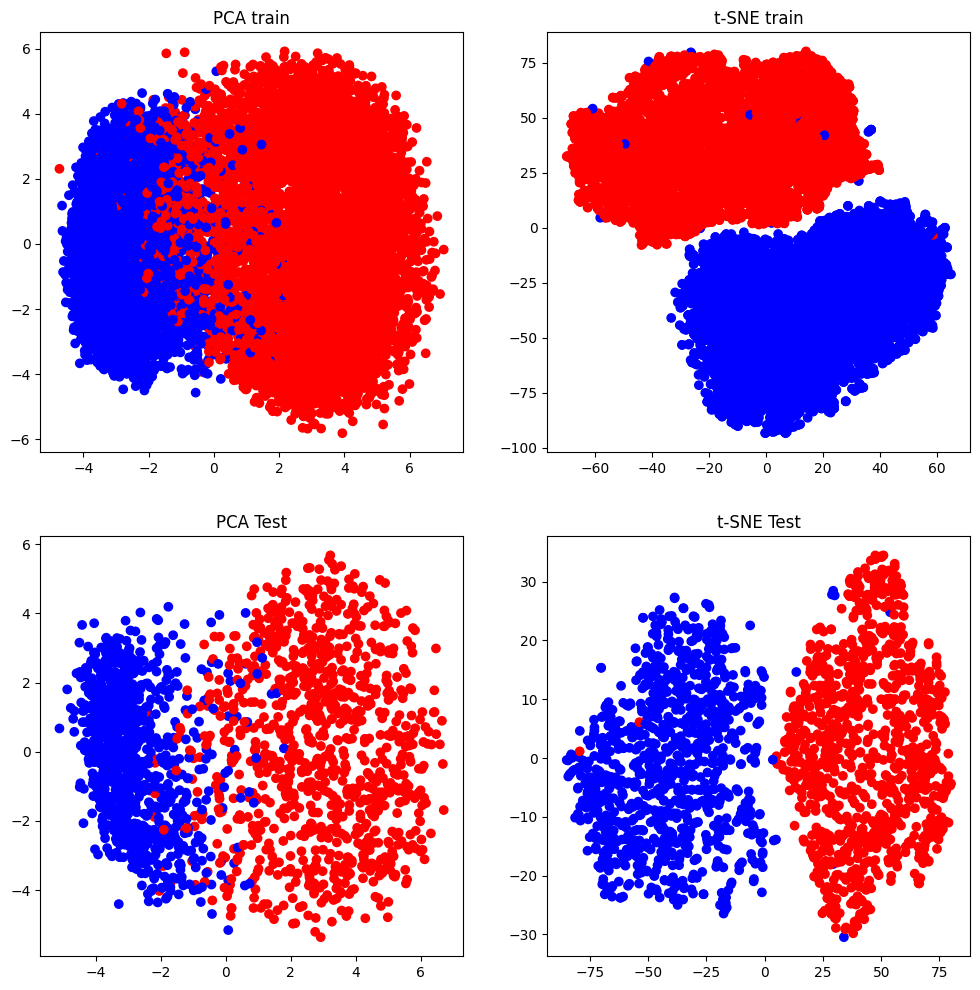

In [40]:
from app.modules.scikit_learn_methods import plot_PCA_TSNE_scikit
plot_PCA_TSNE_scikit()

The PCA_accuracy score of 0.9519 indicates that the model using the reduction to 2 features had a significant reduction in accuracy compared to using the original features. depending on the need of the accuracy it can be acceptable to use because it  is a significant reduction in memory and compute usage

The TSNE_accuracy score of 0.9425 indicates that the model using the reduction to 2 features had a significant reduction in accuracy compared to using the original features. depending on the need of the accuracy it can be acceptable to use because it  is a significant reduction in memory and compute usage

in the scikit learn implementation of PCA and TSNE the is a significant improvement in accuracy compared to using the unsupervised module, this is very important because the scikit learn methods are much faster and use better algorithms to fit,predict and compile the datasets and reduce dimensionality

8. What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for
implementing them)[https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Remov
al%20with%20Robust%20PCA.ipynb]

In order to make the PCA method more robust we need to implement the following steps:

1. Truncated SVD or randomized SVD: Truncated Singular Value Decomposition is a variation of PCA that truncates the singular values of the data matrix. This method is less sensitive to outliers and can provide a more stable solution.
2. using a randomized SVD in order to eliminate background and noise and make more accurate eigenvalues and eigenvectors minimizing ∥M−L∥b where L has rank-k and L is a low rank matrix made vi trucated SVD
3. preprocess the data to eliminate outliers and noise


9. What are the underlying mathematical principles behind UMAP? What is it useful for?

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that uses a combination of mathematical principles from nerve theorem, graph theory, Riemannian geometry, and topological data analysis to construct a low-dimensional representation of high-dimensional data.

-The nerve theorem is used to construct a simplicial complex that captures the topological structure of the data. UMAP constructs a weighted k-nearest neighbor graph, where each data point is connected to its k nearest neighbors, and uses the weights on these edges to represent the degree of similarity between the connected points.

-Riemannian geometry is used to measure the distance between points in the low-dimensional space by minimizing a cost function based on a Riemannian metric, which measures the curvature of a space.

-Topological Data Analysis (TDA) is a branch of mathematics that uses algebraic topology to study the topological structure of data. In the context of UMAP, TDA is used to construct a simplicial complex using the Mapper algorithm, which constructs a simplicial complex based on a cover of overlapping sets.

10. What are the underlying mathematical principles behind LDA? What is it useful for?

LDA (Latent Dirichlet Allocation) is a probabilistic model that is used to uncover the underlying topics in a set of documents. The model is based on several mathematical principles, each with its own role in the LDA algorithm.

-the Dirichlet distribution is used to model the distribution of topics over a set of documents. This distribution is a probability distribution over a simplex, which represents a multi-dimensional space whose points all lie on the surface of a hyperplane.

-Bayesian inference is used to update our beliefs about the topic structure based on new evidence. Bayes theorem is a mathematical formula that allows us to update our prior beliefs about a hypothesis based on new evidence, and in the context of LDA, this is used to infer the underlying topic structure of a set of documents.

-LDA can also be viewed as a form of matrix factorization, where a matrix of word frequencies is factorized into two matrices representing the distribution of topics over the words and the distribution of documents over the topics. This factorization is achieved using Bayesian inference and optimization techniques.

11. Use your unsupervised Python package as a basis to build an HTTP server that receives a record as input
and returns the class of the image. Suggestions: MNIST digit classifier, Iris classifier...

I saved the models and PCA,TSNE in pickels and load them into a FASTAPI @get method that returns a prediction of a random sample of the mnist model, as i show in the following to pictures

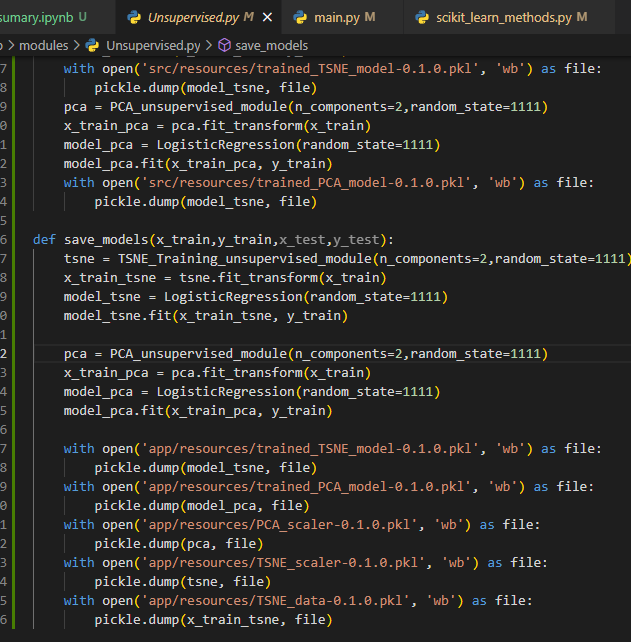

In [5]:
from IPython import display
display.Image("app/resources/save_models.png")

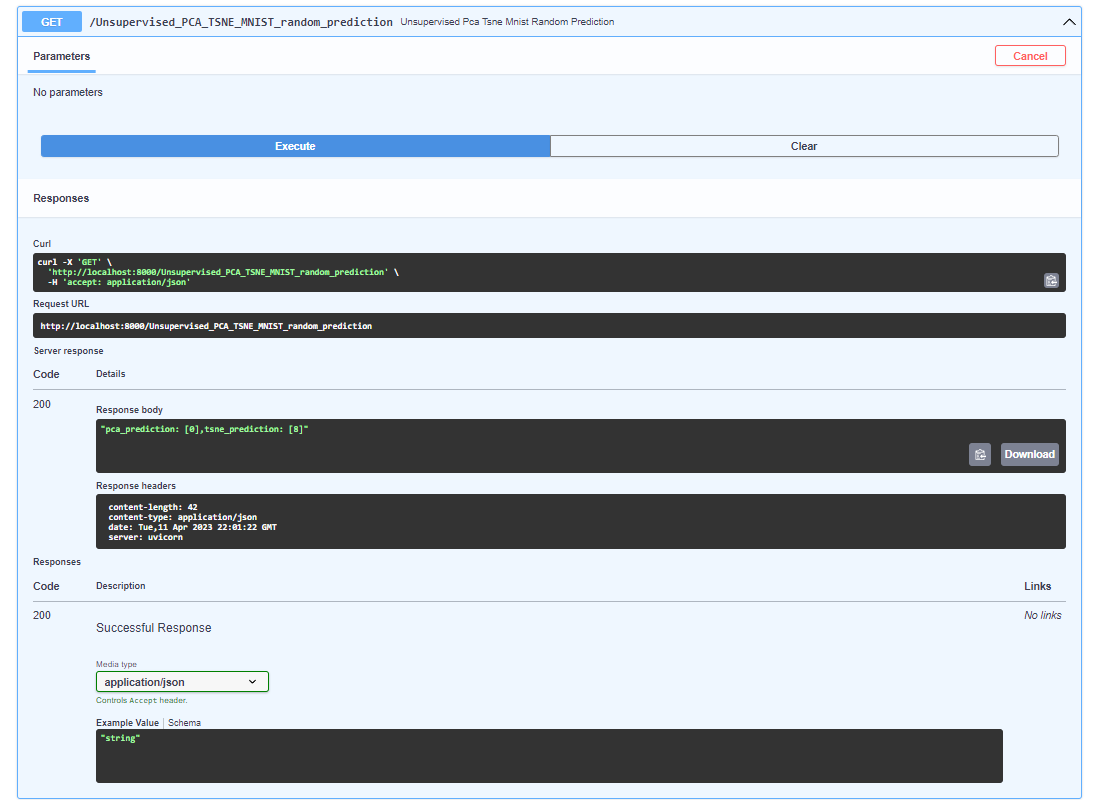

In [6]:
display.Image("app/resources/fastapi_11_response.png")